<a href="https://colab.research.google.com/github/Harshwardhandere/Harshwardhandere/blob/main/AMAZON_TOP_50_SELLING_BOOKS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df= pd.read_csv('/bestsellers with categories.csv.xls')

In [ ]:
# EXPLORATORY DATA ANLYSIS

In [ ]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [ ]:
# prompt: Using dataframe df:

df.groupby('Genre').agg({'Price': 'mean'})


,Price
Genre,
Fiction,10.850000
Non Fiction,14.841935


In [ ]:
df.columns

Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')

In [ ]:
df.tail()

,Name,Author,User Rating,Reviews,Price,Year,Genre
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction
549,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2019,Non Fiction


In [ ]:
df.shape

(550, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [ ]:
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [ ]:
df.isnull().any()

Name           False
Author         False
User Rating    False
Reviews        False
Price          False
Year           False
Genre          False
dtype: bool

In [ ]:
df.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

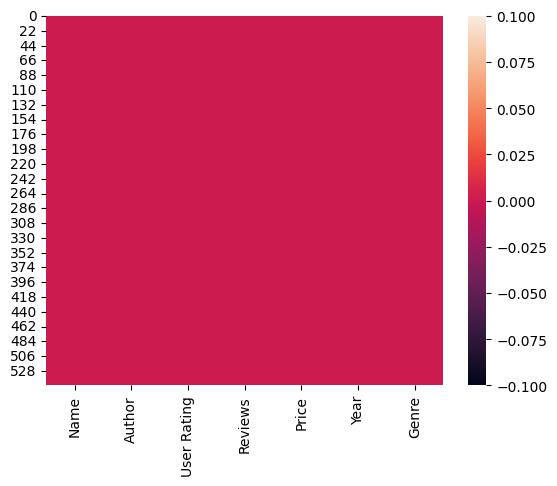

In [ ]:
# we can use haeat map to show the correlation btwn columns

sns.heatmap(df.isnull())
plt.show

In [ ]:
# outlier setection and treatment
# outlier are derivative vlaues are derivated from observation on data and they may indicate a varabillity and measures exprimental errors
# box plots are great ways too detecting outliers . once outliers detected
# they can be imputed as 5th and 95th percentiles


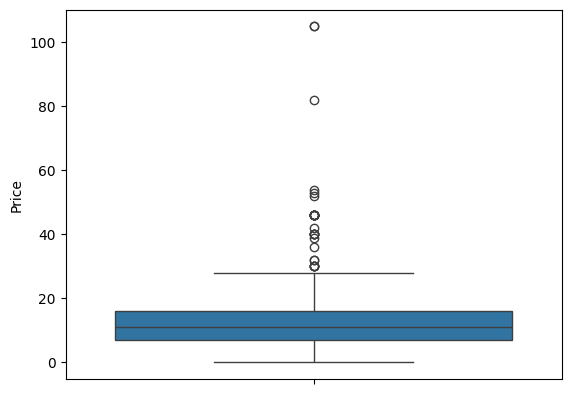

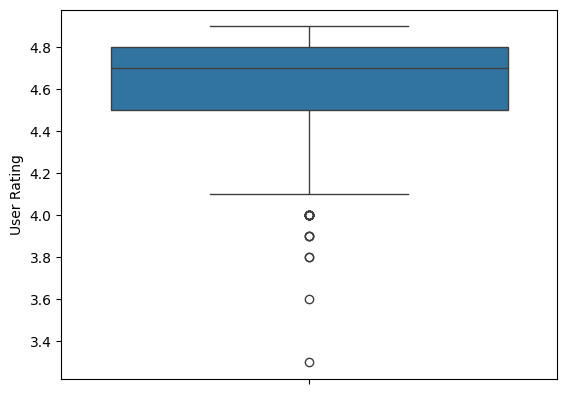

In [ ]:


# Outliers detection and treatment

# Outliers are derivative values that are derived from observations on data and they may indicate variability in data and measure experimental errors.
# Box plots are great ways to detect outliers. Once outliers are detected, they can be imputed as 5th and 95th percentiles.

# Box plot for Price
sns.boxplot(df['Price'])
plt.show()

# Outlier treatment for Price
q1 = df['Price'].quantile(0.05)
q3 = df['Price'].quantile(0.95)
df['Price'] = df['Price'].clip(lower=q1, upper=q3)

# Box plot for User Rating
sns.boxplot(df['User Rating'])
plt.show()

# Outlier treatment for User Rating
q1 = df['User Rating'].quantile(0.05)
q3 = df['User Rating'].quantile(0.95)
df['User Rating'] = df['User Rating'].clip(lower=q1, upper=q3)


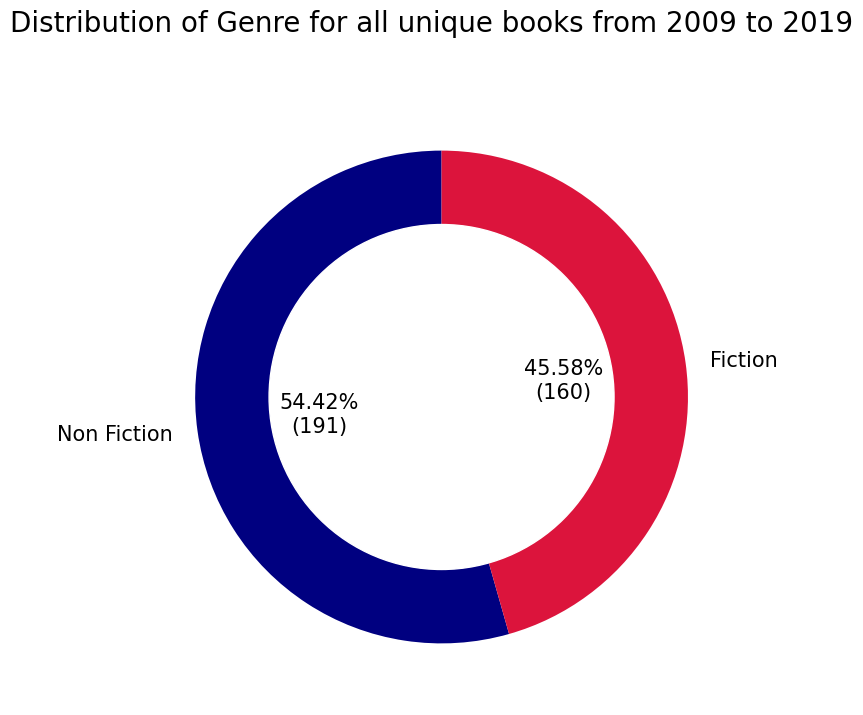

In [ ]:
no_dup = df.drop_duplicates('Name')
g_count = no_dup['Genre'].value_counts()

fig, ax = plt.subplots(figsize=(8, 8))

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%\n({v:d})'.format(p=pct,v=val)
    return my_autopct

genre_col = ['navy','crimson']
#genre_col = ['khaki','plum']

center_circle = plt.Circle((0, 0), 0.7, color='white')
plt.pie(x=g_count.values, labels=g_count.index, autopct=make_autopct(g_count.values),
          startangle=90, textprops={'size': 15}, pctdistance=0.5, colors=genre_col)
ax.add_artist(center_circle)

fig.suptitle('Distribution of Genre for all unique books from 2009 to 2019', fontsize=20)
fig.show()

<ipython-input-24-bc42ea27cf36>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels(top_authors.index, fontweight='semibold')


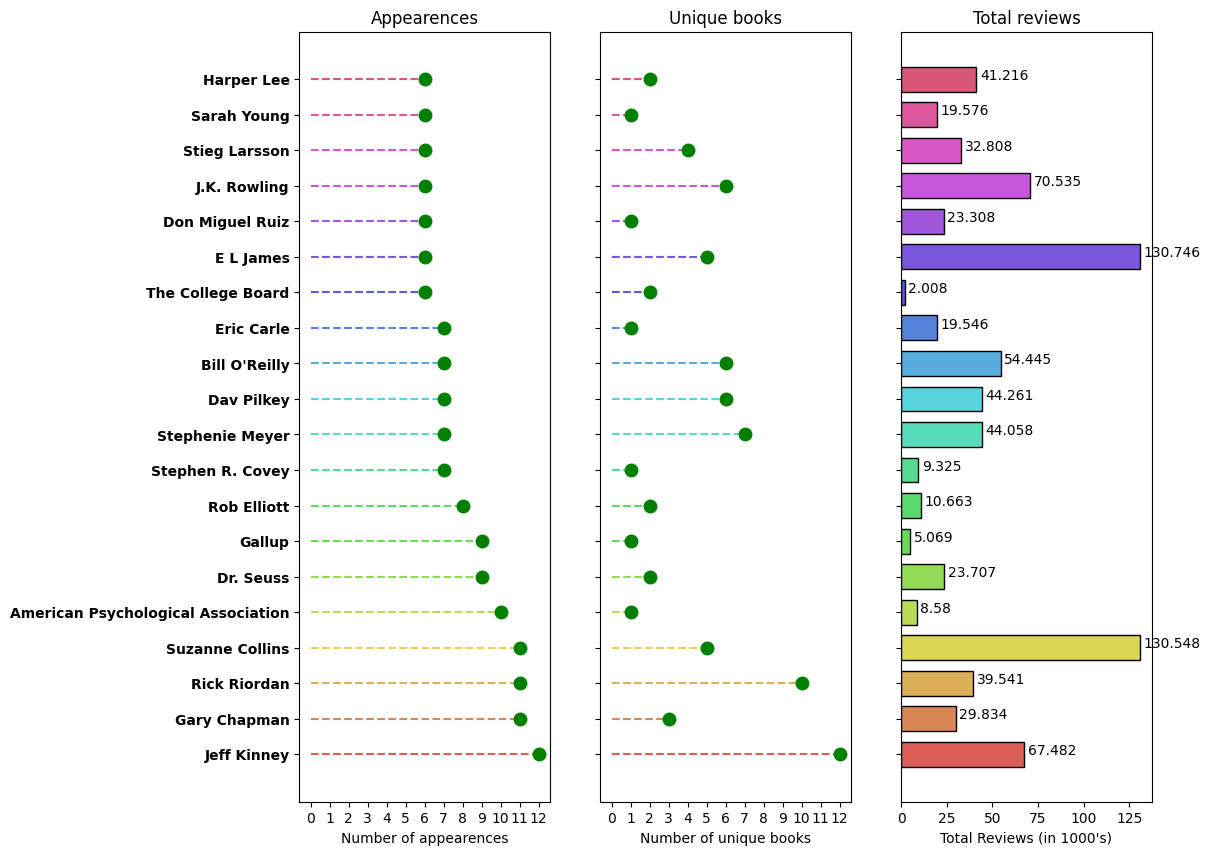

In [ ]:
n_best = 20

top_authors = df.Author.value_counts().nlargest(n_best)
no_dup = df.drop_duplicates('Name') # removes all rows with duplicate book names

fig, ax = plt.subplots(1, 3, figsize=(11,10), sharey=True)

color = sns.color_palette("hls", n_best)

ax[0].hlines(y=top_authors.index , xmin=0, xmax=top_authors.values, color=color, linestyles='dashed')
ax[0].plot(top_authors.values, top_authors.index, 'go', markersize=9)
ax[0].set_xlabel('Number of appearences')
ax[0].set_xticks(np.arange(top_authors.values.max()+1))
ax[0].set_yticklabels(top_authors.index, fontweight='semibold')

ax[0].set_title('Appearences')

book_count = []
total_reviews = []
for name, col in zip(top_authors.index, color):
    book_count.append(len(no_dup[no_dup.Author == name]['Name']))
    total_reviews.append(no_dup[no_dup.Author == name]['Reviews'].sum()/1000)
ax[1].hlines(y=top_authors.index , xmin=0, xmax=book_count, color=color, linestyles='dashed')
ax[1].plot(book_count, top_authors.index, 'go', markersize=9)
ax[1].set_xlabel('Number of unique books')
ax[1].set_xticks(np.arange(max(book_count)+1))
ax[1].set_title('Unique books')

ax[2].barh(y=top_authors.index, width=total_reviews, color=color, edgecolor='black', height=0.7)
for name, val in zip(top_authors.index, total_reviews):
    ax[2].text(val+2, name, val)
ax[2].set_xlabel("Total Reviews (in 1000's)")
ax[2].set_title('Total reviews')

#plt.suptitle('Top 20 best selling Authors (from 2009 to 2019) details', fontsize=15)
plt.show()